In [1]:
from pytorch_lightning import Trainer
from model import LitUnet
from dataset import RetinaDataModule
from utils import *
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

set_seed()

EXP_ID = 19120


BASE_DIRECTORY = "dataset"

model = LitUnet.load_from_checkpoint(
    checkpoint_path= f"/scratch/y.aboelwafa/Retina/Retina_Blood_Vessel_Segmentation/checkpoints/lightning_{EXP_ID}.ckpt",
    in_channels=3,
    out_channels=1,
    learning_rate=1e-4,
)

test_transform = A.Compose(
    [
        A.Resize(512, 512),
    ]
)

dm = RetinaDataModule(
    BASE_DIRECTORY,
    train_transform=None,
    test_transform=test_transform,
    batch_size=1,
)

/home/y.aboelwafa/.conda/envs/cv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


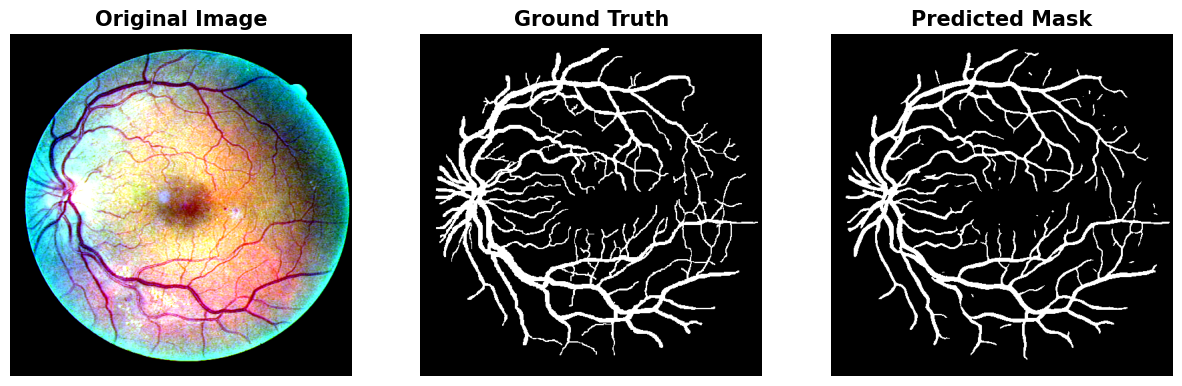

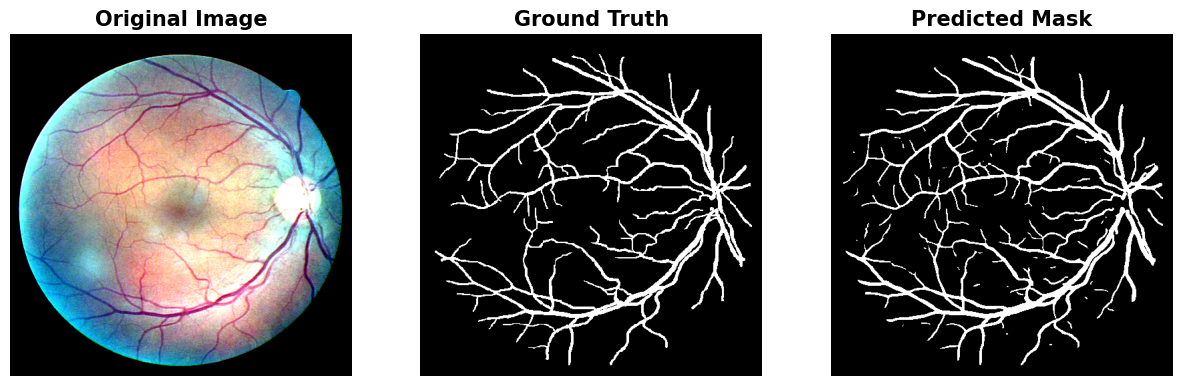

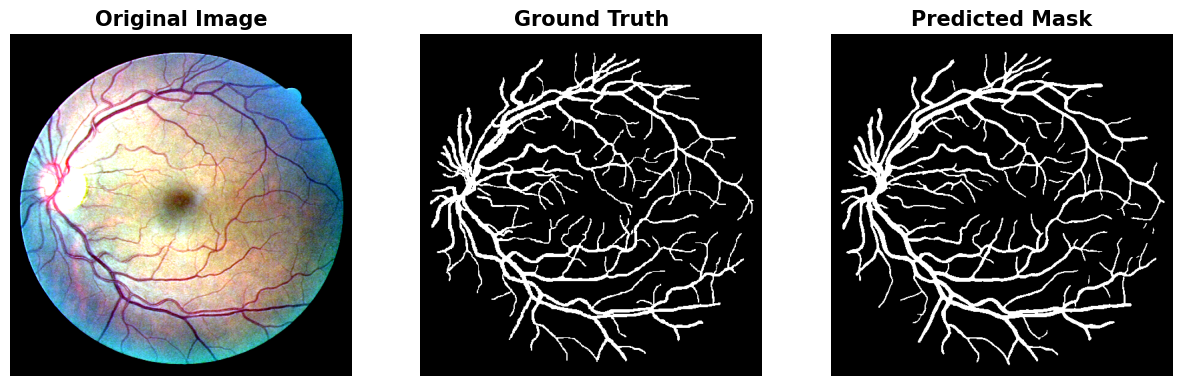

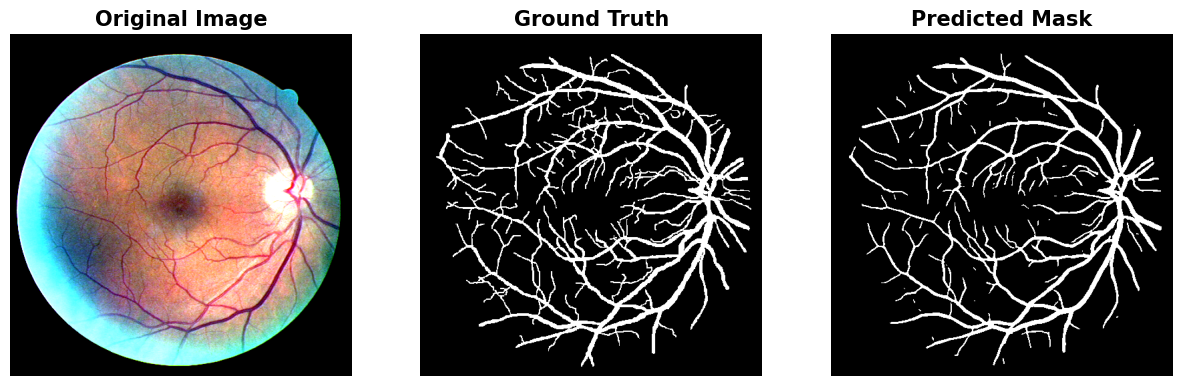

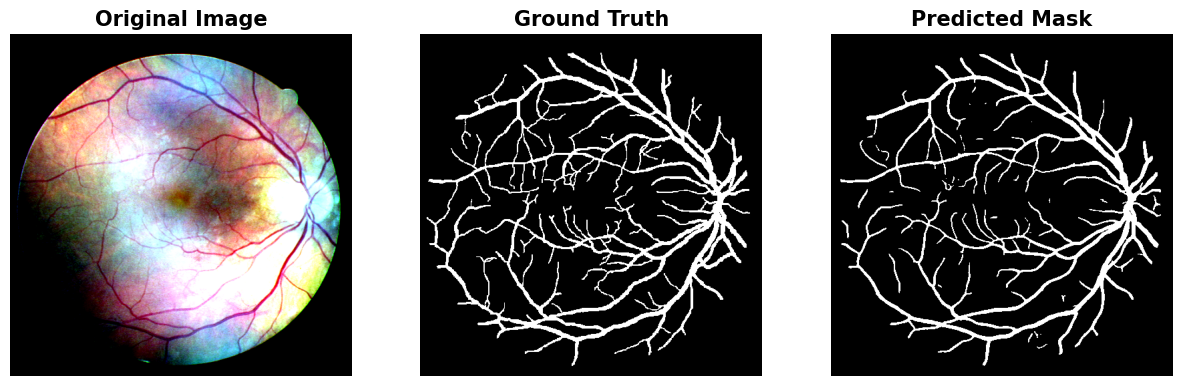

In [4]:
dm.setup(stage='test')
test_dataset = dm.test_dataloader().dataset
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

show_imgs = 5
random_list = np.random.choice(len(test_dataset), show_imgs, replace=False)

for i in range(show_imgs):
    img, mask = test_dataset[random_list[i]]
    img = img.unsqueeze(0).to(device)
    mask = mask.unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(img)
    pred = torch.sigmoid(pred)
    pred = (pred > 0.5).float()
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img.squeeze().cpu().permute(1, 2, 0).numpy())
    ax[0].set_title("Original Image", fontsize=15, weight='bold')
    ax[0].axis('off')
    ax[1].imshow(mask.squeeze().cpu().numpy(), cmap='gray')
    ax[1].set_title("Ground Truth", fontsize=15, weight='bold')
    ax[1].axis('off')
    ax[2].imshow(pred.squeeze().cpu().numpy(), cmap='gray')
    ax[2].set_title("Predicted Mask", fontsize=15, weight='bold')
    ax[2].axis('off')
    plt.show()